# Simple Linear Regression

This project aims at constructing simple linear regressions using a data set on Sacramento real estate sales. 
The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [178]:
## import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

from matplotlib import pyplot as plt

%matplotlib inline

In [179]:
sac_dat = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

In [180]:
sac_dat.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 



In [181]:
# getting data tpye of sac data farme
sac_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [182]:
sac_dat.shape

(985, 12)

In [185]:
# Check if there is any missing value (nulls)

sac_dat.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [ ]:
# No missing values found

In [186]:
# Describibng the sac data sets
sac_dat.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [ ]:
# There are  0 and negative minimum values for sq_ft and price which are unreasonable

In [187]:
# count sq_ft values <=0  
sac_dat[sac_dat['sq__ft']<=0].value_counts().sum()

172

In [188]:
# count price values <=0  
sac_dat[sac_dat['price']<=0].value_counts().sum()

1

In [189]:
# Drop un reasonable minim value
# Drop sq_ft <=0
sac_dat.drop(sac_dat[sac_dat['sq__ft'] <= 0].index, inplace = True)

In [190]:
# Drop negative price

sac_dat.drop(sac_dat[sac_dat['price'] <= 0].index, inplace = True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [ ]:
# A:  zip, beds, baths, sq_ft and sales date qualify to predict price

In [199]:
# Select variables required for SLR model
sac_dat2= sac_dat[['zip', 'beds','baths','sq__ft','price', 'sale_date']]

sac_dat2.head()

,zip,beds,baths,sq__ft,price,sale_date
0,95838,2,1,836,59222,Wed May 21 00:00:00 EDT 2008
1,95823,3,1,1167,68212,Wed May 21 00:00:00 EDT 2008
2,95815,2,1,796,68880,Wed May 21 00:00:00 EDT 2008
3,95815,2,1,852,69307,Wed May 21 00:00:00 EDT 2008
4,95824,2,1,797,81900,Wed May 21 00:00:00 EDT 2008


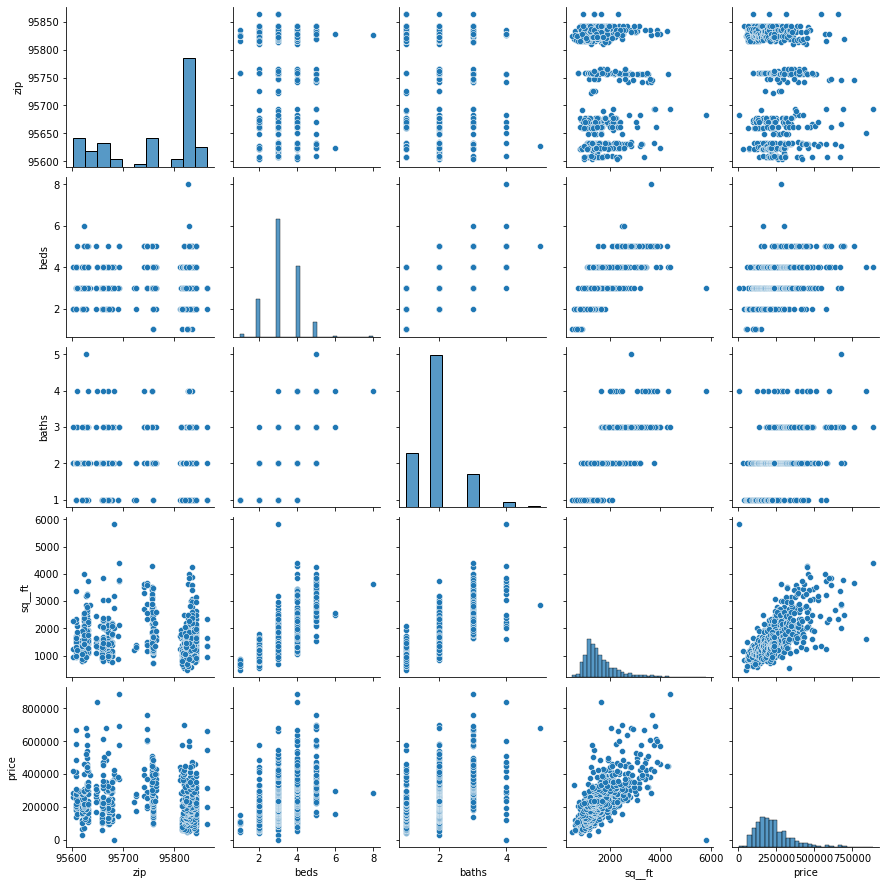

In [200]:
## plot pairs to visually evaluate possible correlations

sns.pairplot(sac_dat2)

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [ ]:
# A: sq.ft is best predictor of price

### 5. Build a function that takes in two lists, `Y` and `X`, as parameters and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

>_**Note:**_ You should **not** instantiate a linear regression model or implement any methods from `sklearn` to create this function. 

In [75]:
# import scipy.stats as stats

In [92]:
# A function that takes X and Y and returns the interception and slope coefficients

def best_fit_slope(x,y):
    m=(((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)**2) - np.mean(x**2)))
    intercept= np.mean(y)-m*np.mean(x)
    print("Intercept is : {}".format(intercept))
    print("Slope is: {}".format(m))

In [93]:
# Test the function
best_fit_slope(x=sac_dat2['sq__ft'], y=sac_dat2['price'])

Intercept is : 29984.361726519826
Slope is: 125.31418257510138


### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# Intercept is the point where a line or curve croses the axis of the line or curve. It is the value returned when the x value is 0

In [ ]:
# A: Slope is the value thet dependent variable changes when the independent variable increases by a unit

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
# A:This model can be used to get a line of best fit for predicting independent 
 # the value of dependent varaible for every value of the independent input varaible.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [94]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [95]:
x = sac_dat[['zip', 'beds','baths','sq__ft']]
y = sac_dat['price']


In [96]:
lm= LinearRegression()

In [97]:
lm.fit(x,y)

LinearRegression()

In [98]:
predictions = lm.predict(x)

In [99]:
# Residuals
residuals = y- predictions
residuals.mean()

1.4571246185865788e-09

Text(0, 0.5, 'Residuals')

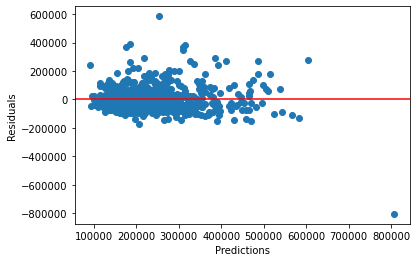

In [78]:
## plot residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='r')

plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [102]:
# A:

type_dummy= pd.get_dummies(sac_dat['type'])

type_dummy.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove the "Unkown" variable from the four variables in your dummy-coded  dataframe and add the remaining dummy-coded variables to the original dataframe.
> _**Note:**_ You may have already created the dummy columns on the original dataframe. If so, you can just leave them there, no problem, but still remove "Unkown".  
_**Hint:**_ You also may not see an "Unkown" dummy column. If you don't see it, identify in which step above you removed all "Unkown" observations.

In [104]:
# A:
sac_dat['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [ ]:
## Unknown colums are alraedy removed

In [108]:
sac_dat= sac_dat.merge(type_dummy,left_index=True, right_index=True)

sac_dat.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,longitude,Condo_x,Multi-Family_x,Residential_x,Condo_y,Multi-Family_y,Residential_y,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,-121.434879,0,0,1,0,0,1,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,-121.431028,0,0,1,0,0,1,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,-121.443839,0,0,1,0,0,1,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,-121.439146,0,0,1,0,0,1,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,-121.435768,0,0,1,0,0,1,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [109]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [130]:
# Features for the model 


x=sac_dat[['beds', 'baths', 'sq__ft','Residential_x']]

y= sac_dat['price']

In [125]:
lm= LinearRegression()

In [126]:
model=lm.fit(x,y)

In [127]:
prediction= model.predict(x)

In [129]:
# getting coefficients
lm.score(x,y)

0.49147471674222754

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

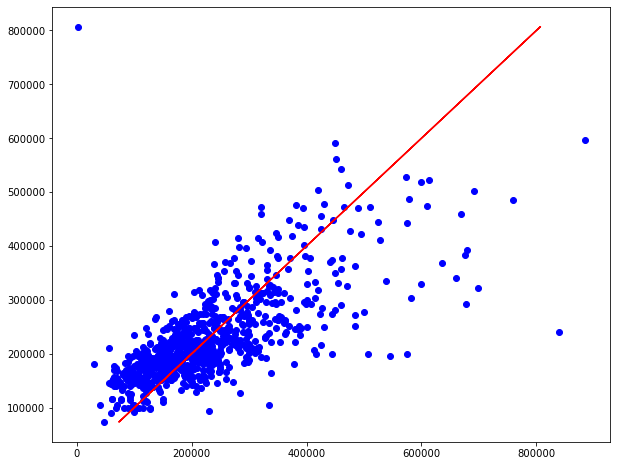

In [133]:
# A:

plt.figure(figsize= (10,8))

plt.scatter(y, prediction, color='blue')

# add prediction line (1:1 line)
plt.plot(prediction, prediction, color='red')


### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [162]:
# A:

def adjusted_r2(x,y):
    lm= LinearRegression()
    model= lm.fit(x,y)
    r_squared = model.score(x,y)
    r2_adj = 1- (1-r_squared) *(len(y)-1) / (len(y) - x.shape[1]-1)
    
    print("r2_: {}".format(r_squared))
    print("r2_adj: {}".format(r2_adj))

In [161]:
# Test the function
adjusted_r2(x,y)

r2_: 0.49147471674222754
r2_adj: 0.48895726484491187


### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [173]:
# A:

def Regression_metrics(x,y):
    lm= LinearRegression ()
    model= lm.fit(x,y)
    y_pred = model.predict(x) # this is y_hat
    
    # Getting metrics
    r_squared = model.score(x,y)
    r2_adj = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
    MAE = metrics.mean_absolute_error(y, y_pred)
    MSE =metrics.mean_squared_error(y,y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y,y_pred))
    median_ABE= metrics.median_absolute_error(y, y_pred)
    
    print('r2 :{} '.format(r_squared))
    print('r2_adj : {} '.format(r2_adj))
    print('MAE : {} '.format(MAE))
    print('MSE : {} '.format(MSE))
    print('RMSE : {} '.format(RMSE))
    print('Median_ABE :{} '.format(median_ABE))

In [172]:
Regression_metrics(x,y)

r2 :0.49147471674222754 
r2_adj : 0.48895726484491187 
MAE : 59079.030662765515 
MSE : 7301277354.770586 
RMSE : 85447.51227958943 
Median_ABE :46839.851103631605 


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [203]:
# Take away  features and adjust model, predict price only from sq ft, beds and baths
x=sac_dat[['beds', 'baths', 'sq__ft']]

y= sac_dat['price']


lm= LinearRegression()

model= lm.fit(x,y)

In [205]:
prediction= model.predict(x)

In [206]:
## check new metrics

Regression_metrics(x,y)

r2 :0.48482934022078183 
r2_adj : 0.4829189422240727 
MAE : 59708.23510473913 
MSE : 7396689989.515358 
RMSE : 86004.0114733921 
Median_ABE :47433.18812445039 


In [ ]:
# There is slight change of the new metrics. For instance, R2 decreased from 0.4914 to 0.4848 

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?